# Sentiment Analysis for Mental Health Monitoring 🤯
___

> [dataset source](https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health) 🔗

---
<img src="https://img.freepik.com/free-vector/mental-health-awareness-concept_23-2148531011.jpg" alt="Sample Image" >






```


```
---


## **About The Datset** 🧷
This comprehensive dataset is a meticulously curated collection of mental health statuses tagged from various statements. The dataset amalgamates raw data from multiple sources, cleaned and compiled to create a robust resource for developing chatbots and performing sentiment analysis.

---
## **Data Souce** 🌍
The dataset integrates information from the following Kaggle datasets:

 - 3k Conversations Dataset for Chatbot
 - Depression Reddit Cleaned
 - Human Stress Prediction
 - Predicting Anxiety in Mental Health Data
 - Mental Health Dataset Bipolar
 - Reddit Mental Health Data
 - Students Anxiety and Depression Dataset
 - Suicidal Mental Health Dataset
 - Suicidal Tweet Detection Dataset
---

###  **Datset Over View**  :

* **Description:**

    This dataset is a comprehensive collection of 50,000 text statements related to mental health, each tagged with one of seven mental health statuses. The primary purpose of this dataset is to assist in building machine learning models for classifying mental health conditions based on textual data, such as social media posts or other user-generated content.

* **Columns:**
  1. **unique_id**: A unique identifier for each entry.
  2. **statement**: A piece of text, typically a statement or comment, associated with a particular mental health status.
  3. **status**: The mental health status assigned to the statement. The possible categories are:
    - Normal
    - Depression
    - Suicidal
    - Anxiety
    - Stress
    - Bi-Polar
    - Personality Disorder

---
### **Usage** :
This dataset is ideal for training machine learning models aimed at understanding and predicting mental health conditions based on textual data.
It can be used in various applications such as:

- Chatbot development for mental health support.
- Sentiment analysis to gauge mental health trends.
-
---

### **How we use NLP Concepts**


  In our text processing methodology, we begin by removing punctuation, URLs, and hyperlinks from the statements. Additionally, we eliminate stop words, such as "is," "are," and "the," to enhance the focus on more informative terms.


  In the realm of morphological analysis, we extract the stems of the words. Subsequently, we employ a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer to transform the processed text into a vector representation. This vector is then utilized to fit the mode

---

### **Conlusion**
  in the conclusion we train and tune  a four model wich is :
  * SVM  
  * Logistic Regression
  * Neural Ntwork
  * KNN
  the first three give a Convergent results with accuracy near to 76 % , and the last one give  a 65 % acc .

```css












```

---



## Import Libraries :
---
lets start by importing the nessacary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE

import re
import random
#from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


## Loading the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CombinedData.csv', index_col=0)

In [ ]:
df.head(3)

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety


**notes1:** as we se at first , we have a three column the id which we should drop it, the statment that represent the "input" and the output which is the status. so our problem is just a classification and we need to make a nlp pre processing to extract feature  as we can from the statment to make them as input to the model.

**note2:** as we say, also we wil add some statistical feature (test len) to  nlp extracted features.

### some random example :

* to see the statement how itis

In [ ]:
# Group by status and get a random statement from each group
random_statements = df.groupby('status')['statement'].apply(lambda x: x.sample(n=1).iloc[0])

# Print the results
for status, statement in random_statements.items():
    print(f"Status: {status}\n")
    print(f"Statement: {statement}\n")
    print("-----------------------------------")

Status: Anxiety

Statement: Can abandoned/old syringe needles give you HIVs? * Age: 16
* Sex: Male
* Height: 5'4
* Weight: 100 lbs
* Race: American
* Duration of complaint: 1 day

Recently, was doing a small club cleanup and we've found like 6-7 syringe needles (some covered w/ blood) during our beach cleanup. However, I didn't touch them with my paper gloves at all but I've used sticks to find them. I'm starting to feel a little paranoid/insecure that even though I didn't touch them at all, the club decided to keep going at it and we were still picking up sticks and cleaning the rocky side of the island. And I was wearing slippers during that cleanup and didn't get to wash my hands right away.

Can abandoned/old syringe needles give you HIVs? And is it only possible when injected? (I also probably should get blood tested if only I can convince my parents (they don't usually believe my suspicious concerns) to schedule an appointment)

-----------------------------------
Status: Bipolar

---
### Data set Descriping and statistics

In [ ]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


### Missings Value

In [ ]:
df.isna().sum()

,0
statement,362
status,0


In [ ]:
df.dropna(inplace = True)
df.isna().sum()

,0
statement,0
status,0


### Labels



In [ ]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

### How the samples are distributed over the status ?

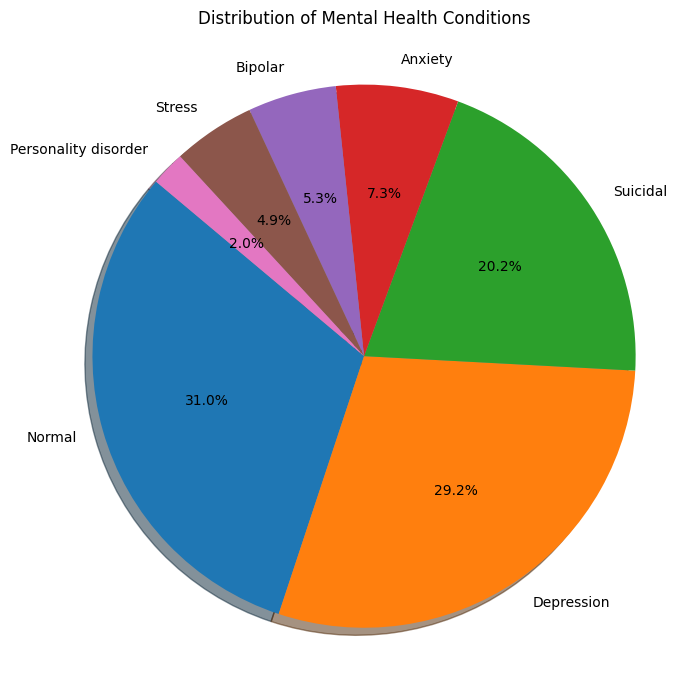

In [ ]:
# Count the occurrences of each category
status_counts = df['status'].value_counts()

# Define colors for each category (7 colors for 7 categories)
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')

# Display the chart
plt.tight_layout()
plt.show()

### How the statements length are distibuted?

In [ ]:
# calculate the length of each statement
df['statemnent_length'] = df['statement'].str.len()


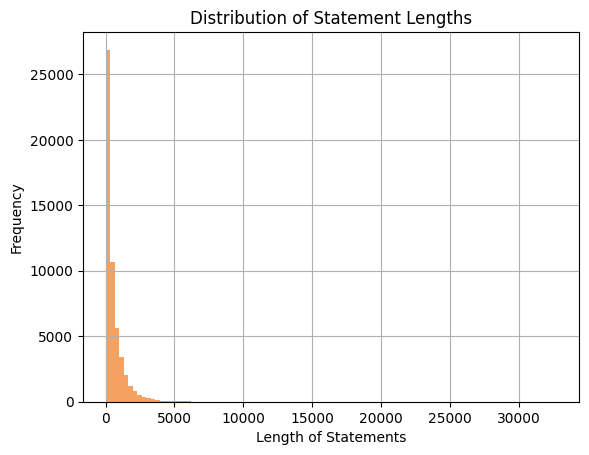

In [ ]:
# plot the distribution of statement lengths
df['statemnent_length'].hist(bins=100, color='#F4A261')
plt.title('Distribution of Statement Lengths')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['statemnent_length'].quantile(0.25)
Q3 = df['statemnent_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

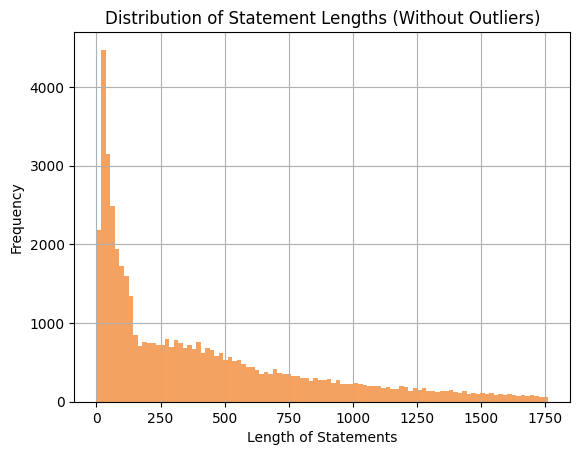

In [ ]:
# Filter out the outliers
filtered_df = df[(df['statemnent_length'] >= lower_bound) & (df['statemnent_length'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['statemnent_length'].hist(bins=100, color='#F4A261')
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

---
```








```
```








```
---

In [ ]:
 nltk.download('stopwords')
 nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLP Pre Processing
---

in this part of the file we do the following
  1. lower casing and pattern reomving (links,emails and etc.)

  2. tokinezation

  3. stemming


### 1. Loweer Casing

In [ ]:
df['statement']=df['statement'].str.lower()
df.sample(1)

,statement,status,statemnent_length
42475,seating here helping my baby with his paper we...,Normal,93


### Special Patterns Removing

In [ ]:
def remove_patterns(text):

    # remove URL's
    text = re.sub(r'http[s]?://\S+', '', text)

    # remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)

    # remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# apply the function to the statements
df['statement'] = df['statement'].apply(remove_patterns)

## Remove Stop words

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

In [ ]:
df['statement'] = df['statement'].apply(remove_stopwords)

### 3.Tokenization

In [ ]:
# Calculate the number of characters and sentences
df['num_of_sentences'] = df['statement'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
# apply word tokenize to each element in the statements
df['tokens'] = df['statement'].apply(word_tokenize)

df.sample(5)

,statement,status,statemnent_length,num_of_sentences,tokens
39928,wait school counselor give update whole online...,Depression,1916,1,"[wait, school, counselor, give, update, whole,..."
5372,understand feel patient another level bullshit,Normal,68,1,"[understand, feel, patient, another, level, bu..."
14372,nothing seems good moment laying bed full anxi...,Depression,529,1,"[nothing, seems, good, moment, laying, bed, fu..."
28421,im working ass im getting right responses appl...,Stress,352,1,"[im, working, ass, im, getting, right, respons..."
39773,thought wanting exist much denial spoken other...,Depression,2172,1,"[thought, wanting, exist, much, denial, spoken..."


### 4. Stemming

In [ ]:
# Initialize the stemmer
stemmer = nltk.SnowballStemmer("english")

# Function to stem tokens and convert them to strings
def stem_tokens(tokens):
    return ' '.join(stemmer.stem(str(token)) for token in tokens)

# Apply the function to the 'tokens' column
df['tokens_stemmed'] = df['tokens'].apply(stem_tokens)

df.sample(5)

,statement,status,statemnent_length,num_of_sentences,tokens,tokens_stemmed
51784,ive diagnosed bpd borderline personality disor...,Personality disorder,1056,1,"[ive, diagnosed, bpd, borderline, personality,...",ive diagnos bpd borderlin person disord 4 year...
28726,2 socialize sure evolve lone creatures always ...,Normal,827,1,"[2, socialize, sure, evolve, lone, creatures, ...",2 social sure evolv lone creatur alway evolv p...
22244,anxiety since age 11 ruined childhood derealiz...,Suicidal,4075,1,"[anxiety, since, age, 11, ruined, childhood, d...",anxieti sinc age 11 ruin childhood dereal craz...
13119,53 years trauma trauma loss loss narcmom never...,Suicidal,1215,1,"[53, years, trauma, trauma, loss, loss, narcmo...",53 year trauma trauma loss loss narcmom never ...
35540,2 things hello ive suffering anxiety life got ...,Anxiety,1865,1,"[2, things, hello, ive, suffering, anxiety, li...",2 thing hello ive suffer anxieti life got diag...


---

```



```
---


## word counts

In [ ]:
colors = ['#16325B', '#227B94', '#78B7D0', '#FFDC7F', '#18587A', '#11999E', '#283644']

# Define a color function
def color_func(word, font_size, position, orientation, random_state=101, **kwargs):
    return random.choice(colors)

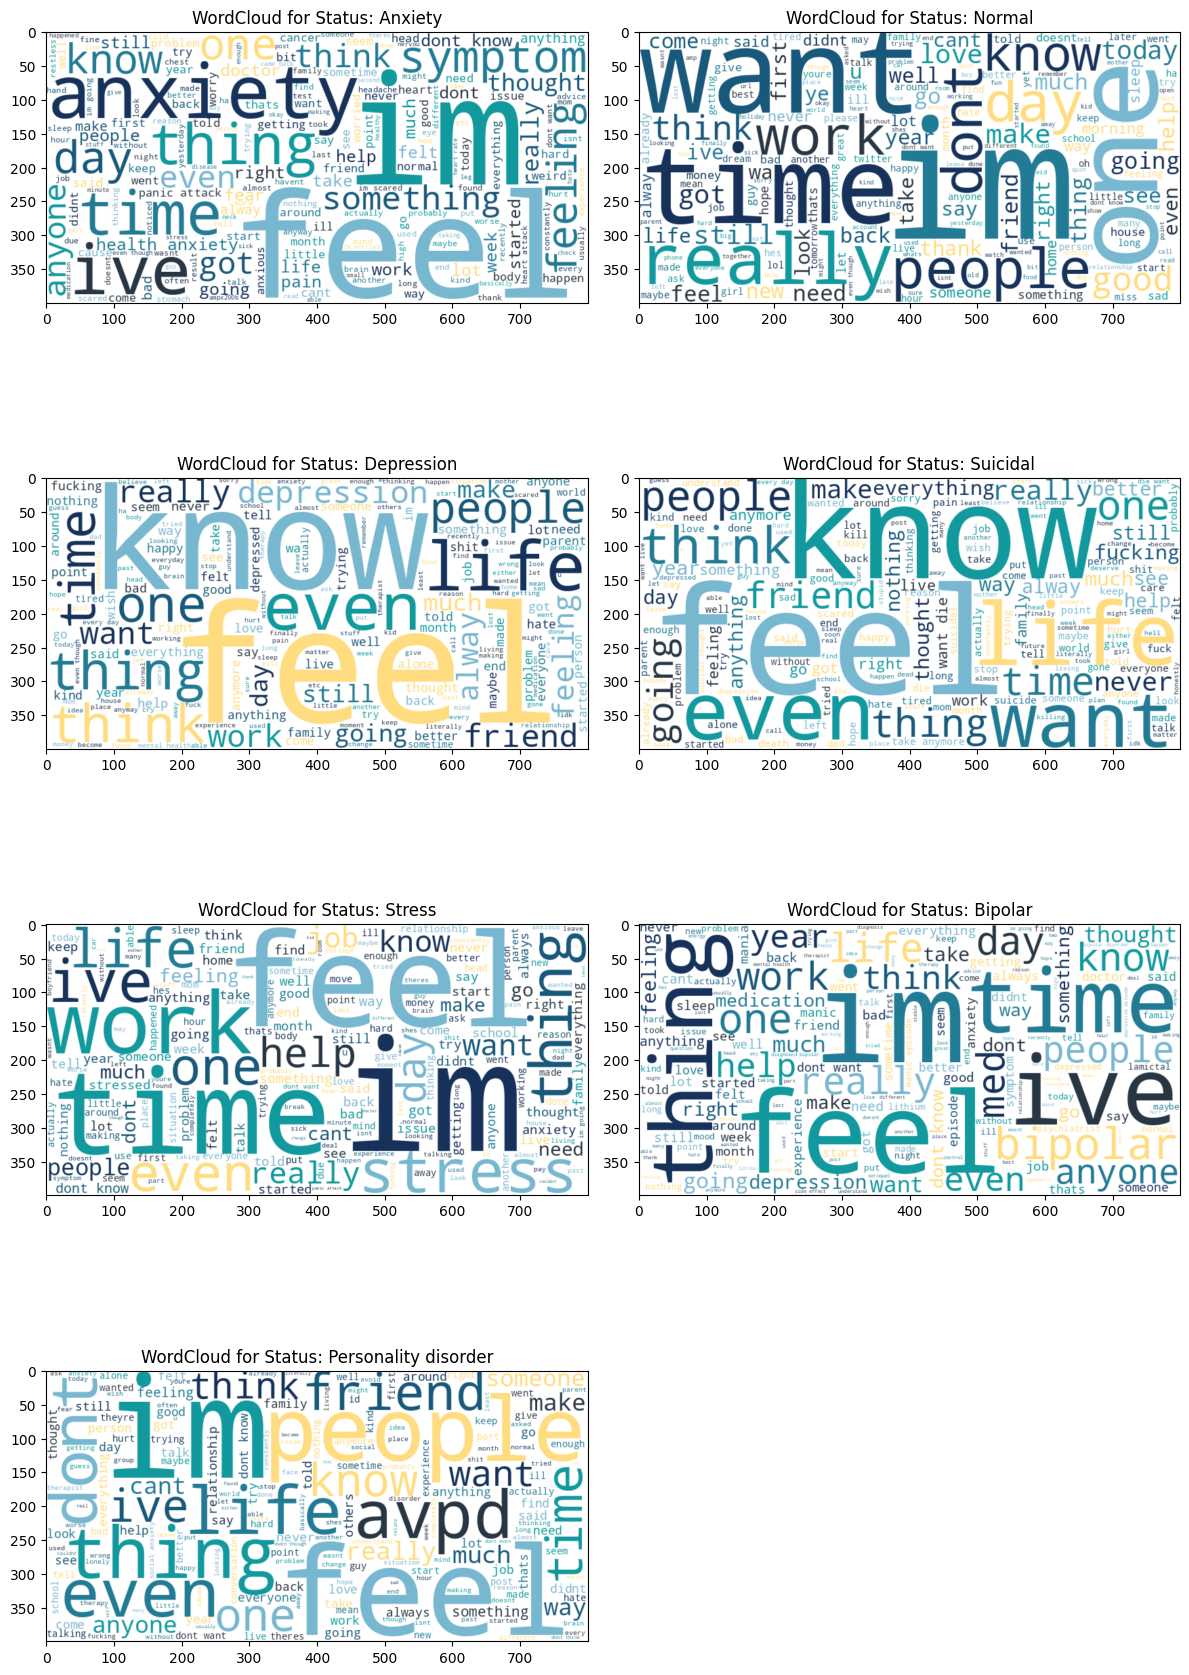

In [ ]:
statuses = df['status'].unique()

plt.figure(figsize=(12, 36))  # Adjust figure size as needed

# Generate and plot the WordCloud for each category
for i, status in enumerate(statuses):
    # Filter the tokens data for the current status
    tokens_data = ' '.join(df[df['status'] == status]['tokens'].dropna().apply(lambda x: ' '.join(x)).tolist())

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    # Plot the WordCloud in a subplot
    axes = plt.subplot(len(statuses) // 2 + 1, 2, i + 1)  # Adjust number of rows and columns dynamically
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for Status: {status}')
    #plt.axis('off')  # Turn off axes for a cleaner look

# Apply tight layout after generating all subplots
plt.tight_layout()

# Adjust the vertical spacing between subplots (hspace controls vertical space)
plt.subplots_adjust(hspace= -0.8)
plt.show()

---
```








```
---



### What is the TF (Term of Frequency) and IDF (Inverse Document Frequency)?

---
```


```
---

* **What is TF-IDF?**

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used to evaluate the importance of a word in a document relative to a collection of documents, typically in the context of text mining and Natural Language Processing (NLP). It is commonly used as a feature extraction method to convert textual data into numerical features that machine learning models can process.

* The TF-IDF measure combines two components:

  1. **Term Frequency (TF):**

  **Definition:** The number of times a word (term) appears in a document, divided by the total number of words in that document. It gives us a sense of how important a word is within a single document.

  **Formula:**

   \begin{align}
   \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
   \end{align}

  
  2. **Inverse Document Frequency (IDF):**
  
    **Definition:** The logarithm of the total number of documents in the corpus divided by the number of documents containing the term.
  
    It measures how important a word is across the whole corpus. Common words that appear in many documents (like "the," "is") have low IDF values because they are less informative, while rare terms have higher IDF values.

    **Formula:**



  \begin{align}
   \text{IDF}(t, D) = \log \left( \frac{\text{Total number of documents in the corpus}}{1 + \text{Number of documents containing the term } t} \right)
 \end{align}

3. **TF-IDF:**

  **Definition:** The product of the term frequency (TF) and inverse document frequency (IDF) for a term in a document. It reflects both the term's frequency within a specific document and how unique or important the term is across the entire document corpus.
  
  **Formula:**

   \begin{align}
   \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
   \end{align}

  In these formulas:
  - \( t \) refers to a term (word),
  - \( d \) refers to a document,
  - \( D \) refers to the entire corpus (collection of documents),
  - \( \log \) is the logarithm function, typically base 10 or natural logarithm.


* **How TF-IDF is Useful**
  **Feature Extraction in NLP:** TF-IDF helps convert raw text data into a matrix of numerical features, making the data suitable for machine learning models. Each document is represented as a vector of TF-IDF values, where each value corresponds to the importance of a word in that document. This is a common technique in text classification tasks, such as sentiment analysis, spam detection, and topic classification.

  **Captures the Importance of Words:** By using TF-IDF, we can ignore frequently occurring but uninformative words (e.g., "the", "and") and focus on more meaningful terms that are key to the context of a document. This helps improve the accuracy and relevance of the model's predictions by emphasizing words that differentiate one document from another.

  **Reduces Noise in Text:** TF-IDF reduces the weight of very common words across all documents, as they are often not useful for distinguishing between documents. It assigns higher importance to rare and meaningful terms, which tend to carry more information about the content of the document.

  **Improves Text Similarity Measures:** TF-IDF vectors are often used to calculate the similarity between documents (e.g., using cosine similarity). This is useful in tasks like document clustering, search engines, and recommendation systems.

  
* **Use Case in Mental Health Sentiment Analysis**

  In our dataset, which contains mental health-related statements, applying TF-IDF can help the model understand which words are most significant for predicting the mental health status of a given statement. For example:

    - Words like "hopeless," "depressed," and "suicidal" may have high TF-IDF scores in documents labeled with "Depression" or "Suicidal" mental health statuses, but these words may be rare across other categories.
  
   - Common words like "I," "the," and "is" will have low IDF values since they appear in many documents, making them less useful for classification.

  By transforming the text data into TF-IDF vectors, you provide a more informative and compact representation of the statements, which can lead to better performance of machine learning models.



---
```









```
---

##  Data Pre Processsing


### Taking Features

In [ ]:
X = df[['tokens_stemmed']]
y = df['status']

### labels encodig

In [ ]:
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(y.values)

### Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=601)

# Second split: Temporary set into validation and test sets (50% of the temp set goes to validation, 50% to test)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=601)


### Convert text to features using TF-IDF vectoriser

In [ ]:
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens' column
vectorizer = TfidfVectorizer(max_features=4000)
X_train_tfidf = vectorizer.fit_transform(X_train['tokens_stemmed'])
# X_val_tfidf = vectorizer.transform(X_val['tokens_stemmed'])  # Transform validation set
X_test_tfidf = vectorizer.transform(X_test['tokens_stemmed'])  # Transform test set

# 2.  Extract numerical features for train, validation, and test
# X_train_num = X_train[['statement_length', 'num_of_sentences']].values
# X_val_num = X_val[['statement_length', 'num_of_sentences']].values
# X_test_num = X_test[['statement_length', 'num_of_sentences']].values

# 3. Combine TF-IDF features (and numerical features if used) for train, validation, and test
X_train_combined = hstack([X_train_tfidf])
# X_val_combined = hstack([X_val_tfidf])
X_test_combined = hstack([X_test_tfidf])

# Print number of features used
print('Number of feature words: ', len(vectorizer.get_feature_names_out()))


Number of feature words:  4000


In [ ]:
X_train_combined[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

#  Resampling very importing remmember

In [ ]:
# Convert TF-IDF sparse matrix to dense format for SMOTE
# X_train_dense = X_train_tfidf.toarray()

# Apply SMOTE to the dense matrix
# smote = SMOTE(random_state=42)

# X_train_combined, y_train = smote.fit_resample(X_train_dense, y_train)


### 🖇 Logistic Regression Model

In [ ]:
# Define the LogisticRegression model
clf = LogisticRegression(solver='liblinear', random_state=101)

# Define the hyperparameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the grid search on the training data
grid_search.fit(X_train_combined, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=101, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

#### best params

In [ ]:
# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


#### Confusion Matrix

In [ ]:
#  Predict on the test set using the best model
y_pred = best_clf.predict(X_test_combined)

#  Calculate accuracy
accuracy_reg = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy_reg)

#  Compute the confusion matrix and classification report
conf_matrix_reg = confusion_matrix(y_test, y_pred)
labels = lbl_enc.classes_
print(classification_report(y_test, y_pred, target_names=labels))


Accuracy:  0.7562796583359697
                      precision    recall  f1-score   support

             Anxiety       0.79      0.76      0.78      1200
             Bipolar       0.83      0.72      0.77       812
          Depression       0.71      0.72      0.71      4600
              Normal       0.82      0.95      0.88      4895
Personality disorder       0.80      0.52      0.63       316
              Stress       0.66      0.41      0.51       790
            Suicidal       0.69      0.63      0.66      3192

            accuracy                           0.76     15805
           macro avg       0.76      0.67      0.71     15805
        weighted avg       0.75      0.76      0.75     15805



#### Heat Map

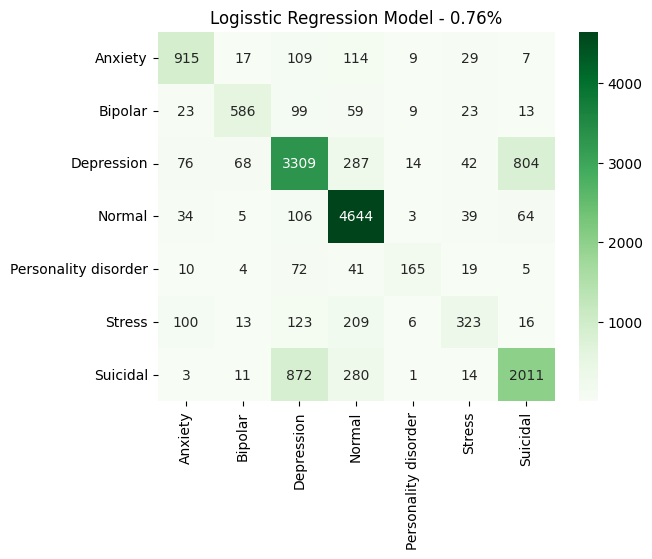

In [ ]:
ax = sns.heatmap(conf_matrix_reg, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'Logisstic Regression Model - {accuracy_reg:.2}%')
plt.show()

### 🎭 KNN Model

#### Model taining

In [ ]:

# Define the KNN model
clf = KNeighborsClassifier()

# Define the hyperparameter grid to search over
param_grid = {
    'n_neighbors': [ 30,70,90,100,150,180],  # Range of neighbors to try
    'weights': ['uniform', 'distance'],  # Whether to use uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan', 'cosine']  # Different distance metrics
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the grid search on the training data
grid_search.fit(X_train_combined, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['cosine'], 'n_neighbors': [100],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
#  Get the best model and hyperparameters
best_knn = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'metric': 'cosine', 'n_neighbors': 100, 'weights': 'distance'}


#### Confnusion matrix

In [ ]:

# Make predictions on the test set using the best model
y_pred = best_knn.predict(X_test_combined)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy_knn)

# Compute the confusion matrix and classification report
conf_matrix_knn = confusion_matrix(y_test, y_pred)
labels = lbl_enc.classes_
print(classification_report(y_test, y_pred, target_names=labels))



Accuracy:  0.6666877570389117
                      precision    recall  f1-score   support

             Anxiety       0.83      0.65      0.73      1200
             Bipolar       0.85      0.55      0.67       812
          Depression       0.63      0.63      0.63      4600
              Normal       0.65      0.93      0.77      4895
Personality disorder       0.98      0.37      0.54       316
              Stress       0.87      0.23      0.37       790
            Suicidal       0.65      0.49      0.56      3192

            accuracy                           0.67     15805
           macro avg       0.78      0.55      0.61     15805
        weighted avg       0.69      0.67      0.65     15805



### 🦽 Support Vector Machine Model

In [ ]:

# Define the SVM model
clf = SVC()

# Define the hyperparameter grid to search over
param_grid = {
    'C': [ 0.1,1,10,100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': [ 'auto','scale'],  # Kernel coefficient for 'rbf', 'poly'
    'degree': [2, 3]  # Degree for polynomial kernel (only relevant for 'poly' kernel)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the grid search on the training data
grid_search.fit(X_train_combined, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1], 'degree': [2], 'gamma': ['scale'],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=1)

In [ ]:
# Get the best model and hyperparameters
best_svm = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


#### Confusion Matrix

In [ ]:


#  Make predictions on the test set using the best model
y_pred = best_svm.predict(X_test_combined)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy_svm)

# Compute the confusion matrix and classification report
conf_matrix_Svm = confusion_matrix(y_test, y_pred)
labels = lbl_enc.classes_
print(classification_report(y_test, y_pred, target_names=labels))



Accuracy:  0.762733312242961
                      precision    recall  f1-score   support

             Anxiety       0.77      0.79      0.78      1200
             Bipolar       0.84      0.71      0.77       812
          Depression       0.69      0.73      0.71      4600
              Normal       0.87      0.94      0.90      4895
Personality disorder       0.82      0.53      0.65       316
              Stress       0.65      0.50      0.56       790
            Suicidal       0.68      0.64      0.66      3192

            accuracy                           0.76     15805
           macro avg       0.76      0.69      0.72     15805
        weighted avg       0.76      0.76      0.76     15805



#### Heat Map

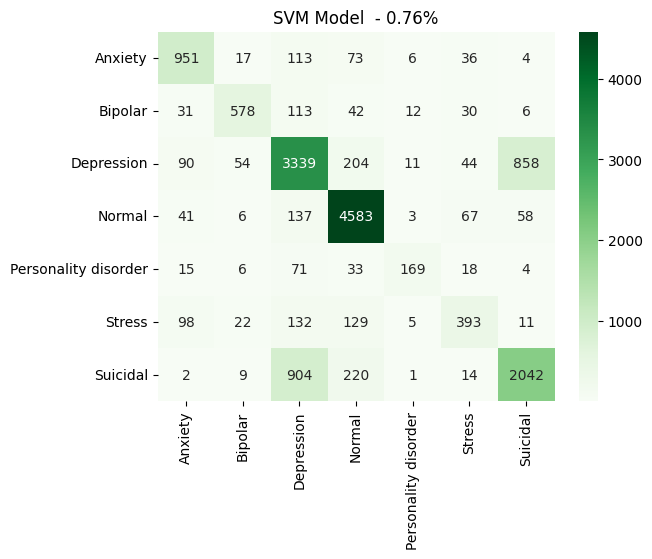

In [ ]:
ax = sns.heatmap(conf_matrix_Svm, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'SVM Model  - {accuracy_svm:.2}%')
plt.show()

### Neural Network

In [ ]:

# Define the layers in an array
layers = [
    Dense(units=128, activation='relu', input_shape=(X_train_combined.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.1),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dropout(rate=0.2),  # Dropout Layer 2
    Dense(units=len(lbl_enc.classes_), activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on training data with validation on the test data
history = model.fit(X_train_combined.toarray(),
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.3
                    )


Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5388 - loss: 2.5398 - val_accuracy: 0.6354 - val_loss: 1.5145
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7234 - loss: 1.1433 - val_accuracy: 0.7355 - val_loss: 1.0598
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7376 - loss: 1.0601 - val_accuracy: 0.7464 - val_loss: 1.0240
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7444 - loss: 1.0372 - val_accuracy: 0.7463 - val_loss: 1.0008
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7517 - loss: 1.0131 - val_accuracy: 0.7361 - val_loss: 1.0000
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7575 - loss: 0.9837 - val_accuracy: 0.7545 - val_loss: 0.9735
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7690 - loss: 0.9491 - val_accuracy: 0.7574 - val_loss: 0.9641
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7748 - loss: 0.9349 - val_

### Confusion Matrix

In [ ]:

# Make predictions on the test set
y_pred_prob = model.predict(X_test_combined.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix
labels = lbl_enc.classes_
conf_matrix_nn = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=labels))


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Accuracy: 0.7524201202151218
                      precision    recall  f1-score   support

             Anxiety       0.78      0.77      0.78      1200
             Bipolar       0.72      0.77      0.75       812
          Depression       0.72      0.69      0.70      4600
              Normal       0.90      0.89      0.90      4895
Personality disorder       0.65      0.60      0.62       316
              Stress       0.53      0.56      0.54       790
            Suicidal       0.65      0.68      0.67      3192

            accuracy                           0.75     15805
           macro avg       0.71      0.71      0.71     15805
        weighted avg       0.75      0.75      0.75     15805



#### Heat Map

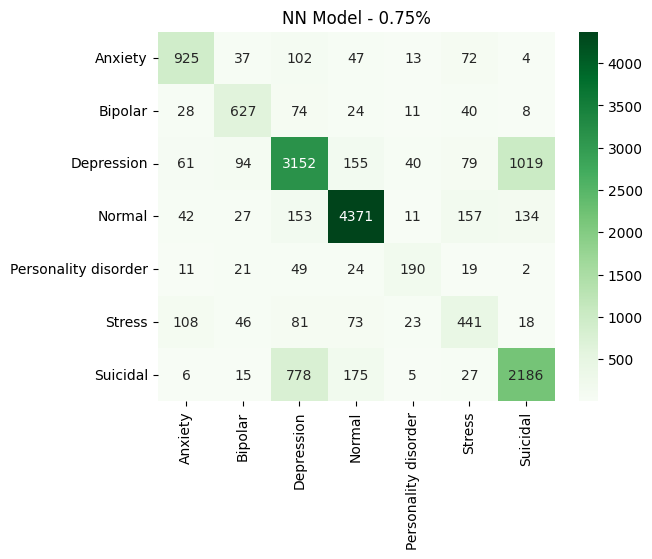

In [ ]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

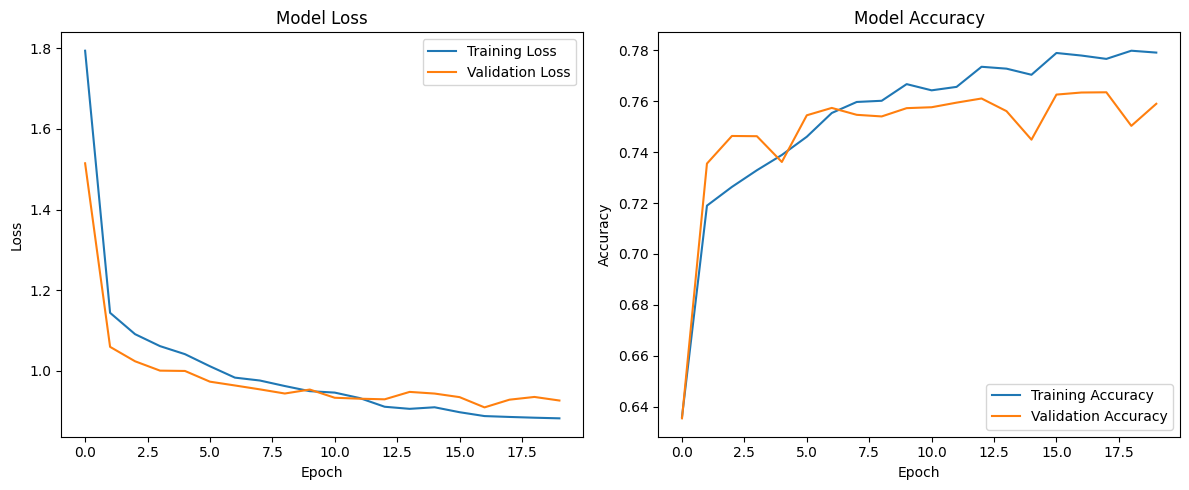

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

---
## End
---

<img src="https://img.freepik.com/free-vector/flat-world-mental-health-day-background_23-2149671212.jpg" alt="Sample Image" width="100%" height="417">
